In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyemma
from sklearn.cluster import KMeans

%matplotlib inline

In [11]:
# all trajectory data concatenated
# wt_mna: 0-1000, 1-2000
# mut_mna: 2000-3000, 3000-4000
# wt_nad: 4000-5000, 5000-6000

x_pca = np.load('../00_raw_data/x_pca.npy')

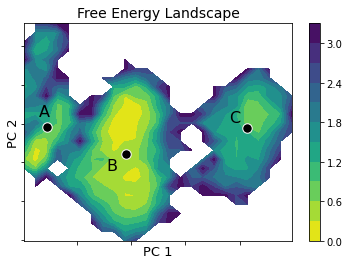

In [12]:
# draw landscape
pyemma.plots.plot_free_energy(x_pca[:, 0], x_pca[:, 1], nbins=25, ncontours=10, cmap='viridis_r',
                              cbar_label='', kT=0.7)

# cluster centers to label plot
km = KMeans(n_clusters=3)
km.fit(x_pca)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='k', s=90, edgecolor='w')

plt.tick_params(labelbottom=False, labelleft=False)
plt.xlabel('PC 1', size=13)
plt.ylabel('PC 2', size=13)
plt.title('Free Energy Landscape', size=14)

plt.text(-0.17, 0.01, 'A', size=16)
plt.text(-0.045, -0.06, 'B', size=16)
plt.text(0.18, 0.002, 'C', size=16)

plt.savefig('fel.png')

In [13]:
def plot_run(x_pca: np.ndarray, 
             run: str, 
             cmap: str, 
             step: int = 2
            ) -> None:
    
    if run == 'wt_mna':
        starts = [0, 1000] 
        ends = [1000, 2000]
    elif run == 'mut_mna':
        starts = [2000, 3000]
        ends = [3000, 4000]
    elif run == 'wt_nad':
        starts = [4000, 5000]
        ends = [5000, 6000]
        
    # full landscape as grey background
    pyemma.plots.plot_free_energy(x_pca[:, 0], x_pca[:, 1], nbins=25, ncontours=10, cmap='Greys_r', alpha=0.5, cbar=False)
    
    # replicates
    plt.scatter(x_pca[starts[0]:ends[0]:step, 0], x_pca[starts[0]:ends[0]:step, 1], c=range(1000//step), cmap=cmap)
    plt.scatter(x_pca[starts[1]:ends[1]:step, 0], x_pca[starts[1]:ends[1]:step, 1], c=range(1000//step), cmap=cmap)
    
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.xlabel('PC 1', size=13)
    plt.ylabel('PC 2', size=13)

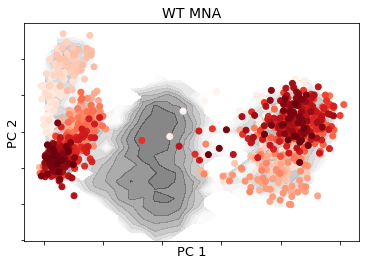

In [14]:
plot_run(x_pca, 'wt_mna', cmap='Reds')
plt.title('WT MNA', size=14)
plt.savefig('wt_mna.png')

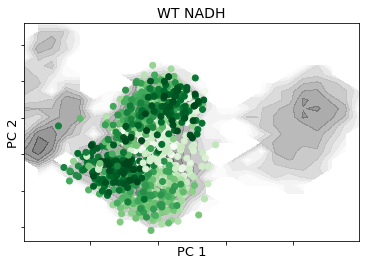

In [15]:
plot_run(x_pca, 'wt_nad', cmap='Greens')
plt.title('WT NADH', size=14)
plt.savefig('wt_nad.png')

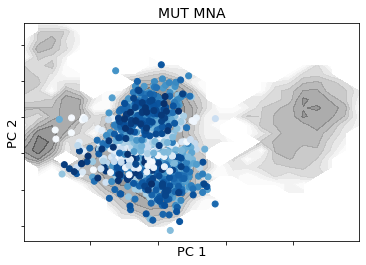

In [17]:
plot_run(x_pca, 'mut_mna', cmap='Blues')
plt.title('MUT MNA', size=14)
plt.savefig('mut_mna.png')